In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [90]:
df=pd.read_excel('/content/Health_insurance_cost (1).xlsx')
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


## Finding missing values

In [92]:
df.isnull().sum()

,0
age,28
gender,0
BMI,23
Children,0
smoking_status,0
location,0
health_insurance_price,2


## Checking whether Age, BMI have outliers and gender

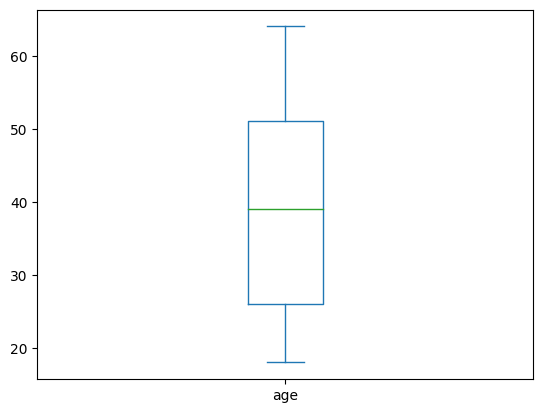

None


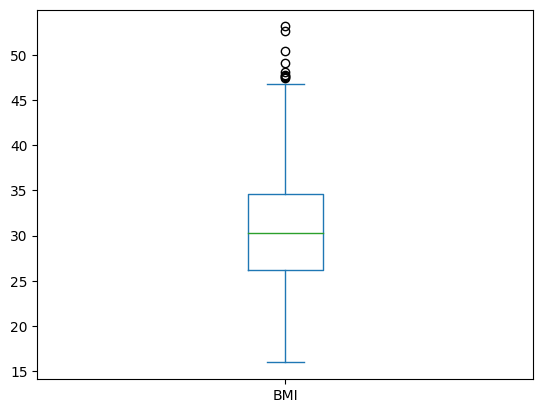

None


In [93]:
df['age'].plot(kind='box')
print(plt.show())
df['BMI'].plot(kind='box')
print(plt.show())

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


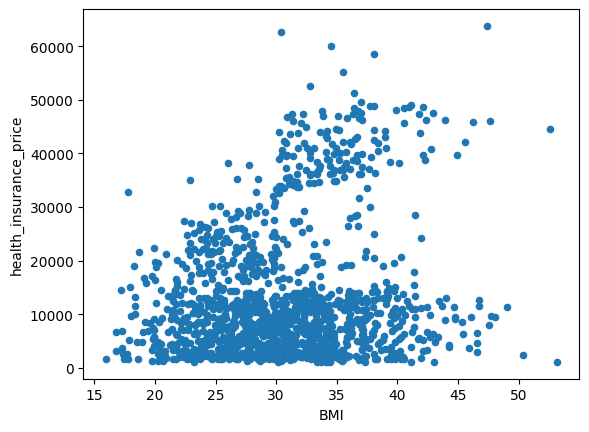

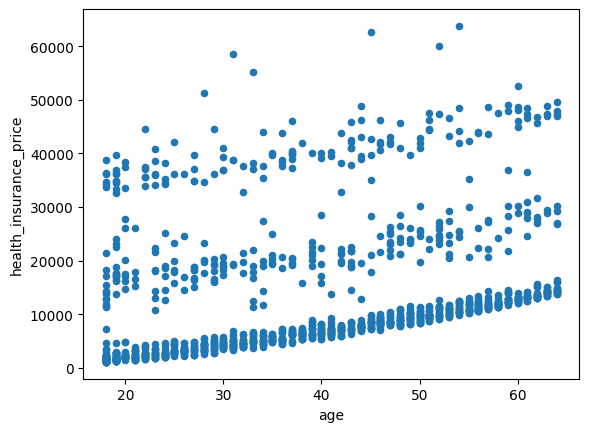

In [94]:
print(df.plot(kind='scatter',x='BMI',y='health_insurance_price'))
print(df.plot(kind='scatter',x='age',y='health_insurance_price'))

## Filling the missing values

In [95]:
median_age=df['age'].median()
median_BMI=df['BMI'].median()

df['age']=df['age'].fillna(median_age)
df['BMI']=df['BMI'].fillna(median_BMI)
df.isna().sum()


,0
age,0
gender,0
BMI,0
Children,0
smoking_status,0
location,0
health_insurance_price,2


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1338 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1338 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


## Treating outliers

In [97]:
#for age column
age_Q1=df['age'].describe()["25%"]
print('age Q1 ',age_Q1)
age_Q3=df['age'].describe()['75%']
print('age Q3 ',age_Q3)
age_IQR=age_Q3-age_Q1
print('age_IQR',age_IQR)

print()
#for BMI column
BMI_Q1=df['BMI'].describe()['25%']
BMI_Q3=df['BMI'].describe()['75%']
print('BMI_Q1 ',BMI_Q1)
print('BMI_Q3 ',BMI_Q3)
BMI_IQR=BMI_Q3-BMI_Q1
print('BMI_IQR ',BMI_IQR)


age_lowerfence=age_Q1-(1.5*age_IQR)
age_upperfence=age_Q3+(1.5*age_IQR)

BMI_lowerfence=BMI_Q1-(1.5*BMI_IQR)
BMI_upperfence=BMI_Q3+(1.5*BMI_IQR)

df['age']=df['age'].clip(age_lowerfence,age_upperfence)
df['BMI']=df['BMI'].clip(BMI_lowerfence,BMI_upperfence)

age Q1  27.0
age Q3  51.0
age_IQR 24.0

BMI_Q1  26.315
BMI_Q3  34.43
BMI_IQR  8.114999999999998


In [98]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


<Axes: >

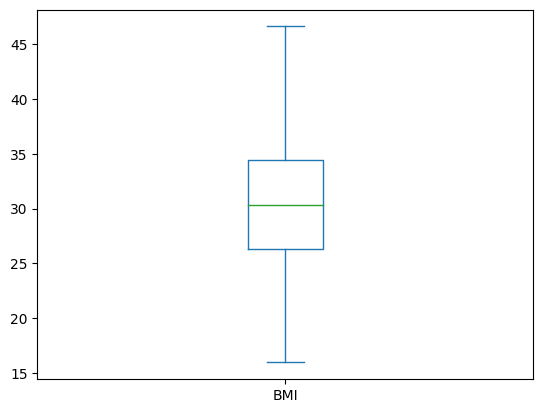

In [99]:
df['BMI'].plot(kind='box')

In [100]:
agehist=px.histogram(df,x='age')
agehist.show()
BMIhist=px.histogram(df,x='BMI')
BMIhist.show()
Childrenhist=px.histogram(df,x='Children')
Childrenhist.show()

## checking correlation

In [101]:
print(df['age'].corr(df['health_insurance_price']))
print(df['BMI'].corr(df['health_insurance_price']))
print(df['Children'].corr(df['health_insurance_price']))

0.29450551945935055
0.19551251181829687
0.06748265133033199


In [102]:
df.head(3)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.9240
1,18.0,male,33.770,1,no,southeast,1725.5523
2,28.0,male,33.000,3,no,southeast,4449.4620


In [105]:
df1=df.copy()
df1.sample()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1267,24.0,male,31.065,0,yes,northeast,34254.05335


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[['age']] = scaler.fit_transform(df1[['age']])
df1['BMI'] = scaler.fit_transform(df1[['BMI']])
df1['Children'] = scaler.fit_transform(df1[['Children']])
df1.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,-1.450336,female,-0.051547,-0.908614,yes,southwest,16884.92400
1,-1.522267,male,0.525881,-0.078767,no,southeast,1725.55230
2,-0.802959,male,0.397564,1.580926,no,southeast,4449.46200
3,-0.443305,male,-1.318054,-0.908614,no,northwest,21984.47061
4,-0.515235,male,-0.289017,-0.908614,no,northwest,3866.85520


In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1338 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1338 non-null   float64
 3   Children                1338 non-null   float64
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


## Encoding categorical variables

In [108]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_cols = ['gender', 'smoking_status','location']
encoded_array = encoder.fit_transform(df1[categorical_cols])
#decoded_df=encoder.reverse_transform(encoded_array)

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([df1, encoded_df], axis=1)
df_encoded

,age,gender,BMI,Children,smoking_status,location,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,-1.450336,female,-0.051547,-0.908614,yes,southwest,16884.92400,0.0,1.0,0.0,0.0,1.0
1,-1.522267,male,0.525881,-0.078767,no,southeast,1725.55230,1.0,0.0,0.0,1.0,0.0
2,-0.802959,male,0.397564,1.580926,no,southeast,4449.46200,1.0,0.0,0.0,1.0,0.0
3,-0.443305,male,-1.318054,-0.908614,no,northwest,21984.47061,1.0,0.0,1.0,0.0,0.0
4,-0.515235,male,-0.289017,-0.908614,no,northwest,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.779519,male,0.059273,1.580926,no,northwest,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,-1.522267,female,0.217586,-0.908614,no,northeast,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,-1.522267,female,1.039149,-0.908614,no,southeast,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,-1.306475,female,-0.802285,-0.908614,no,southwest,2007.94500,0.0,0.0,0.0,0.0,1.0


In [109]:
df_encoded.drop(columns=categorical_cols,inplace=True)


In [110]:
df_encoded.head(3)

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,-1.450336,-0.051547,-0.908614,16884.9240,0.0,1.0,0.0,0.0,1.0
1,-1.522267,0.525881,-0.078767,1725.5523,1.0,0.0,0.0,1.0,0.0
2,-0.802959,0.397564,1.580926,4449.4620,1.0,0.0,0.0,1.0,0.0


In [111]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1338 non-null   float64
 1   BMI                     1338 non-null   float64
 2   Children                1338 non-null   float64
 3   health_insurance_price  1336 non-null   float64
 4   gender_male             1338 non-null   float64
 5   smoking_status_yes      1338 non-null   float64
 6   location_northwest      1338 non-null   float64
 7   location_southeast      1338 non-null   float64
 8   location_southwest      1338 non-null   float64
dtypes: float64(9)
memory usage: 94.2 KB


## Implementing Machine Learning models

In [112]:
df_encoded=df_encoded.dropna()

In [114]:
print(df_encoded.isna().sum())
print(df1.info())

age                       0
BMI                       0
Children                  0
health_insurance_price    0
gender_male               0
smoking_status_yes        0
location_northwest        0
location_southeast        0
location_southwest        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1338 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1338 non-null   float64
 3   Children                1338 non-null   float64
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB
None


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=df_encoded.drop(columns=['health_insurance_price'])
y=df_encoded['health_insurance_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [116]:
import warnings
warnings.filterwarnings("ignore")

In [117]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

           age       BMI  Children  gender_male  smoking_status_yes  \
569   0.635658  1.658238  0.751079          1.0                 1.0   
1277 -0.515235 -0.146535 -0.908614          0.0                 0.0   
49   -0.227512  0.764184 -0.078767          1.0                 1.0   
805   0.419865  0.866671 -0.908614          0.0                 0.0   
922  -0.083651  0.064272 -0.078767          1.0                 0.0   
...        ...       ...       ...          ...                 ...   
763  -0.874890 -0.763957 -0.908614          1.0                 0.0   
835   0.204073  0.892501  0.751079          1.0                 0.0   
1216  0.060211 -0.922270 -0.908614          1.0                 0.0   
559  -1.450336  0.819177 -0.908614          1.0                 0.0   
684  -0.443305 -2.018799 -0.078767          0.0                 0.0   

      location_northwest  location_southeast  location_southwest  
569                  1.0                 0.0                 0.0  
1277         

In [118]:
print(X_train.shape)
print(X_test.shape)
print(df_encoded.shape)

(1068, 8)
(268, 8)
(1336, 9)


In [119]:
#Linear Regression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train) # m and c
print(linear_reg.coef_)
print(linear_reg.intercept_)

[ 3529.38365943  1879.76299879   598.25218156   -79.14078563
 23693.71349116   -97.14360956  -928.66384498  -963.11474756]
8987.932604409252


In [120]:
# Test the model
y_predicted=linear_reg.predict(X_test)
y_predicted

array([ 5705.18670037,  7596.38681003, 27616.60767632,  -774.58406797,
        2377.30053494, 28671.40632702, 11903.05937963,  9064.03538408,
        8895.81762264,  7944.63165925, 11118.56170129, 12181.60081294,
        3499.65379674,  3942.7340555 , 31600.04671139,  6242.12186484,
       10416.21039214, 28679.74308757,  4923.83599569, 33016.80167572,
       11466.00785239, 14898.19338883,  1667.72875314,  3916.45214482,
        4018.72793636, 13516.99664462,  1724.90779197,  8325.41685567,
        9189.01578988, 11720.84549639, 31934.51535392,  9446.28856989,
       13042.08364977, 39723.13794032, 12863.62228798, 23548.90613889,
       11478.39547766,  9719.74508025, 31670.90134733,  2915.27432078,
        8337.11762625,  7824.01281602,  5946.88452937, 35880.10527963,
        5287.9733006 , 26812.52706855,  4132.60867577, 38648.53849074,
       38458.67462706, 14491.35314497, 37065.80758337, 12377.80728956,
       10671.98810041, 28630.14119928, 29701.61362392,  3976.24141691,
      

In [121]:
mse=mean_squared_error(y_test,y_predicted)
mse

33135688.35263045

In [122]:
rmse=np.sqrt(mse)
rmse

5756.360686460713

<Axes: xlabel='age', ylabel='health_insurance_price'>

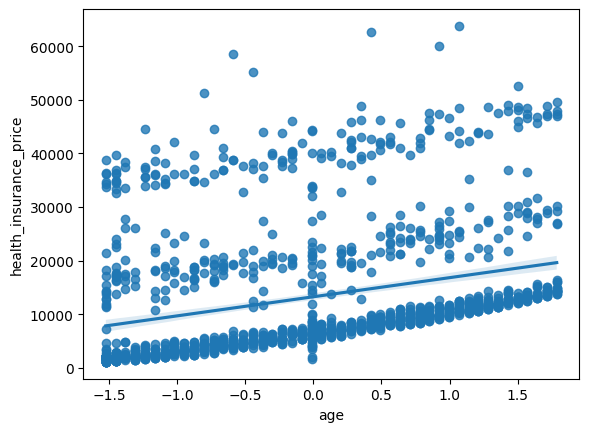

In [123]:
sns.regplot(x=df_encoded["age"],y=df_encoded["health_insurance_price"])

In [124]:
linear_reg.predict([[39,21,2,1,1,0,0,0]])[0]

210919.99536549067

In [126]:
# create the pipeline for this, which includes steps for preprocessing using column transformer and DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
categorical_columns=['gender', 'smoking_status','location']
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),categorical_columns)],remainder="passthrough")

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
pipe_dt=Pipeline(steps=[("preprocessor",ct),("model",DecisionTreeRegressor())])

In [128]:
#deleting the two rows of label with NaN
df=df.dropna()

In [129]:
df.isna().sum()

,0
age,0
gender,0
BMI,0
Children,0
smoking_status,0
location,0
health_insurance_price,0


In [130]:
X=df.drop(columns=['health_insurance_price'])
y=df['health_insurance_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['gender', 'smoking_status',
                                                   'location'])])),
                ('model', DecisionTreeRegressor())])

In [131]:
y_pred=pipe_dt.predict(X_test)

In [132]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)

7056.554086991664


In [133]:
# create the pipeline for this, which includes steps for preprocessing using column transformer and  randomforest regressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
pipe_rf=Pipeline(steps=[("preprocessor",ct),("model",RandomForestRegressor())])

In [134]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['gender', 'smoking_status',
                                                   'location'])])),
                ('model', RandomForestRegressor())])

In [135]:
y_pred=pipe_rf.predict(X_test)

In [136]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)

4418.559464406745


In [137]:
# create the pipeline for this, which includes steps for preprocessing using column transformer and  XGBregressor
from xgboost import XGBRegressor
pipe_xgb=Pipeline(steps=[("preprocessor",ct),("model",XGBRegressor())])

In [139]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['gender', 'smoking_status',
                                                   'location'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=F...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [140]:
# test the model
y_pred=pipe_xgb.predict(X_test)

In [141]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)

4980.85757571296


## GRADIO UI

In [57]:
%%capture
pip install gradio

In [142]:
df.sample()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
352,30.0,female,27.7,0,no,southwest,3554.203


In [156]:
#Since RandomForest gave us the least rmse value, we will use that to build gradio interface
def prediction(age,gender,BMI,Children,smoking_status,location):
  inputs_df=pd.DataFrame([[age,gender,BMI,Children,smoking_status,location]],columns=["age","gender","BMI","Children","smoking_status","location"])
  output=pipe_rf.predict(inputs_df)
  return output[0]
prediction(60,"male",27.7,0,"no","southwest")

12803.367672799995

In [160]:
# create gradio application and add dropdown for categorical variables
import gradio as gr
age=gr.Number(label="Age")
gender=gr.Dropdown(label="gender",choices=["male","female"])
BMI=gr.Number(label="BMI")
Children=gr.Number(label="Children")
smoking_status=gr.Dropdown(label="Smoker",choices=["yes","no"])
location=gr.Dropdown(label="Where do you live?",choices=["northeast","northwest","southeast","southwest"])

demo=gr.Interface(fn=prediction,inputs=[age,gender,BMI,Children,smoking_status,location],
                  outputs=gr.Number(label="Predicted Health Insurance Price"))
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fbf5cf4400677b0313.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
